<a href="https://colab.research.google.com/github/kktsuji/train-lora-cell-rois/blob/main/train_lora_cell_rois.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Variable Settings

# RESOLUTION = "40" # original size
# RESOLUTION = "256"
RESOLUTION = "512" # recommended for sd-1.x

NUM_TRAIN_EPOCHS = "300"

out_dir_name = f"cell-rois_lora_resolution-{RESOLUTION}_epochs-{NUM_TRAIN_EPOCHS}"

In [3]:
import os

out_dir_path = f"/content/drive/MyDrive/Research/LoRAs/{out_dir_name}/"
log_dir_path = f"/content/drive/MyDrive/Research/LoRAs/{out_dir_name}/logs/"
if not os.path.exists(out_dir_path):
  os.makedirs(out_dir_path)
if not os.path.exists(log_dir_path):
  os.makedirs(log_dir_path)
print(out_dir_path)
print(log_dir_path)

base_data_dir_path = "/content/drive/MyDrive/Research/Data/250606_cell_rois/pseudo_rgb/"
print(base_data_dir_path)

model_id = "CompVis/stable-diffusion-v1-4"
model_dir_path = "/content/drive/MyDrive/Research/Models/" + model_id
print(model_dir_path)

if (os.path.exists(out_dir_path) or
  os.path.exists(log_dir_path) or
  os.path.exists(base_data_dir_path) or
  os.path.exists(model_dir_path)):
  print("All directories exist")
else:
  from google.colab import runtime
  runtime.unassign()
  raise Exception("Directory not found")

/content/drive/MyDrive/Research/LoRAs/cell-rois_lora_resolution-512_epochs-300/
/content/drive/MyDrive/Research/LoRAs/cell-rois_lora_resolution-512_epochs-300/logs/
/content/drive/MyDrive/Research/Data/250606_cell_rois/pseudo_rgb/
/content/drive/MyDrive/Research/Models/CompVis/stable-diffusion-v1-4
All directories exist


In [4]:
if not os.path.exists(model_dir_path):
  from diffusers import StableDiffusionPipeline
  import torch
  os.makedirs(model_dir_path)
  pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float32)
  pipe.save_pretrained(model_dir_path)

In [5]:
!git clone -b develop https://github.com/kktsuji/peft.git

import sys
sys.path.append('./peft/examples/stable_diffusion')
import train_dreambooth

print(train_dreambooth.UNET_TARGET_MODULES)

# for "CompVis/stable-diffusion-v1-4"
unet_target_modules = [
    # Convolution layers
    "conv_in", "conv1", "conv2", "conv_out",
    "conv_shortcut", "conv",
    # Linear layers
    "to_q", "to_k", "to_v", "to_out.0",
    "linear_1", "linear_2", "proj_in", "proj_out", "proj",
    "time_emb_proj", "ff.net.0.proj", "ff.net.2",
]

train_dreambooth.UNET_TARGET_MODULES = unet_target_modules
print(train_dreambooth.UNET_TARGET_MODULES)

Cloning into 'peft'...
remote: Enumerating objects: 11539, done.
remote: Counting objects: 100% (220/220), done.
remote: Compressing objects: 100% (150/150), done.
remote: Total 11539 (delta 153), reused 70 (delta 70), pack-reused 11319 (from 2)
Receiving objects: 100% (11539/11539), 17.00 MiB | 8.25 MiB/s, done.
Resolving deltas: 100% (7886/7886), done.
['to_q', 'to_k', 'to_v', 'proj', 'proj_in', 'proj_out', 'conv', 'conv1', 'conv2', 'conv_shortcut', 'to_out.0', 'time_emb_proj', 'ff.net.2']
['conv_in', 'conv1', 'conv2', 'conv_out', 'conv_shortcut', 'conv', 'to_q', 'to_k', 'to_v', 'to_out.0', 'linear_1', 'linear_2', 'proj_in', 'proj_out', 'proj', 'time_emb_proj', 'ff.net.0.proj', 'ff.net.2']


You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
All model checkpoint weights were used when initializing AutoencoderKL.

All the weights of AutoencoderKL were initialized from the model checkpoint at /content/drive/MyDrive/Research/Models/CompVis/stable-diffusion-v1-4.
If your task is similar to the task the model of the checkpoint was trained on, you can already use AutoencoderKL for predictions without further training.
All model checkpoint weights were used when initializing UNet2DConditionModel.

All the weights of UNet2DConditionModel were initialized from the model checkpoint at /content/drive/MyDrive/Research/Models/CompVis/stable-diffusion-v1-4.
If your task is similar to the task the model of the checkpoint was trained on, you can already use UNet2DConditionModel for predictions without further training.


trainable params: 16,931,456 || all params: 876,452,420 || trainable%: 1.9318
PeftModel(
  (base_model): LoraModel(
    (model): UNet2DConditionModel(
      (conv_in): lora.Conv2d(
        (base_layer): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (lora_dropout): ModuleDict(
          (default): Identity()
        )
        (lora_A): ModuleDict(
          (default): Conv2d(4, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (lora_B): ModuleDict(
          (default): Conv2d(16, 320, kernel_size=(1, 1), stride=(1, 1), bias=False)
        )
        (lora_embedding_A): ParameterDict()
        (lora_embedding_B): ParameterDict()
        (lora_magnitude_vector): ModuleDict()
      )
      (time_proj): Timesteps()
      (time_embedding): TimestepEmbedding(
        (linear_1): lora.Linear(
          (base_layer): Linear(in_features=320, out_features=1280, bias=True)
          (lora_dropout): ModuleDict(
            (default): Ide

  0%|          | 0/11100 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/cuda/memory.py:391: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(


GPU Memory before entering the train : 4151
GPU Memory consumed at the end of the train (end-begin): 163
GPU Peak Memory consumed during the train (max-begin): 7554
GPU Total Peak Memory consumed during the train (max): 11705
CPU Memory before entering the train : 1573
CPU Memory consumed at the end of the train (end-begin): 733
CPU Peak Memory consumed during the train (max-begin): 745
CPU Total Peak Memory consumed during the train (max): 2318
GPU Memory before entering the train : 4315
GPU Memory consumed at the end of the train (end-begin): 0
GPU Peak Memory consumed during the train (max-begin): 7390
GPU Total Peak Memory consumed during the train (max): 11705
CPU Memory before entering the train : 2307
CPU Memory consumed at the end of the train (end-begin): 0
CPU Peak Memory consumed during the train (max-begin): 12
CPU Total Peak Memory consumed during the train (max): 2319
GPU Memory before entering the train : 4315
GPU Memory consumed at the end of the train (end-begin): 0
GP

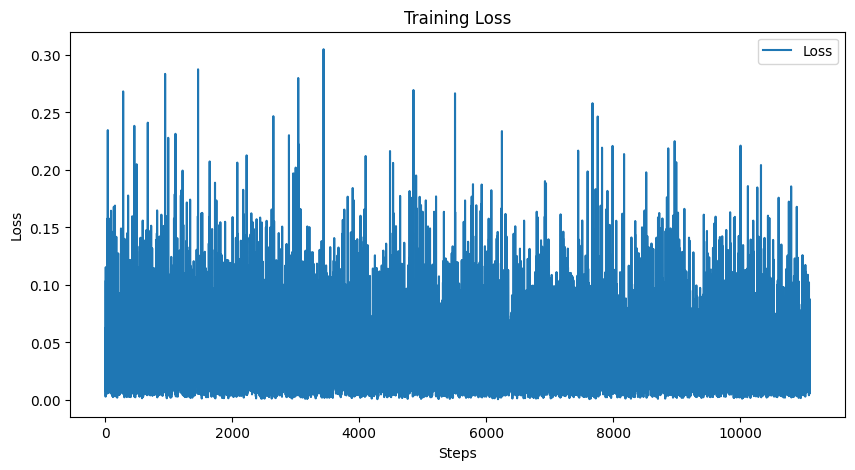

In [6]:
input_args = [
    "--pretrained_model_name_or_path", model_dir_path,
    "--instance_data_dir", base_data_dir_path,
    "--instance_prompt", "rds",
    "--seed", "0",
    "--resolution", RESOLUTION,
    "--output_dir", out_dir_path,
    "--num_train_epochs", NUM_TRAIN_EPOCHS,
    "--lr_scheduler", "cosine",
    "--lr_warmup_steps", "5",
    "--learning_rate", "1e-4",
    "--logging_dir", "logs",
    "--report_to", "tensorboard",
    "lora",
    "--unet_r", "16",
    "--unet_alpha", "16"
]

args = train_dreambooth.parse_args(input_args)
train_dreambooth.main(args)

In [7]:
from google.colab import runtime
runtime.unassign()